# Action2

In [1]:
import pandas as pd 

##### 读取数据，因为是英文数据，所以默认的utf-8编码会报错

In [2]:
data = pd.read_csv('SupplyChain.csv', encoding='unicode_escape')

##### 看一下数据的大致信息

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

##### 检查是否有缺失值

In [4]:
temp = data.isnull().sum()

In [5]:
temp[temp>0]

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

##### 对缺失的数值进行填充

##### 可以将字段中的姓和名连接到一起，之后就可以直接去除Customer Lname这个字段

In [6]:
data[['Customer Fname','Customer Lname']]

,Customer Fname,Customer Lname
0,Cally,Holloway
1,Irene,Luna
2,Gillian,Maldonado
3,Tana,Tate
4,Orli,Hendricks
...,...,...
180514,Maria,Peterson
180515,Ronald,Clark
180516,John,Smith
180517,Mary,Smith


##### 合并姓名字段, 使得Lname可以被去掉

In [7]:
data['Customer name'] = data['Customer Fname'] + ' ' + data['Customer Lname']
data['Customer name']

0            Cally Holloway
1                Irene Luna
2         Gillian Maldonado
3                 Tana Tate
4            Orli Hendricks
                ...        
180514       Maria Peterson
180515         Ronald Clark
180516           John Smith
180517           Mary Smith
180518        Andrea Ortega
Name: Customer name, Length: 180519, dtype: object

In [8]:
data['Customer name']

0            Cally Holloway
1                Irene Luna
2         Gillian Maldonado
3                 Tana Tate
4            Orli Hendricks
                ...        
180514       Maria Peterson
180515         Ronald Clark
180516           John Smith
180517           Mary Smith
180518        Andrea Ortega
Name: Customer name, Length: 180519, dtype: object

In [9]:
data.drop(['Customer Lname'], axis=1,inplace=True)

In [10]:
data.drop(['Customer Fname'], axis=1,inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Id                   

In [16]:
data['Customer Zipcode'].value_counts()

725.0      66770
921.0        337
23455.0      334
957.0        297
79109.0      292
           ...  
89015.0       16
32210.0       15
7728.0        13
11225.0        9
0.0            3
Name: Customer Zipcode, Length: 996, dtype: int64

##### 用0填补缺失值

In [13]:
data['Customer Zipcode'] = data['Customer Zipcode'].fillna(0)

In [14]:
data['Customer Zipcode'].value_counts()

725.0      66770
921.0        337
23455.0      334
957.0        297
79109.0      292
           ...  
89015.0       16
32210.0       15
7728.0        13
11225.0        9
0.0            3
Name: Customer Zipcode, Length: 996, dtype: int64

In [15]:
data['Customer Zipcode'].isnull().sum()

0

##### 看一下Order Zipcode的值和对应的数量

In [19]:
data['Order Zipcode'].value_counts()

10035.0    648
10009.0    550
10024.0    541
94122.0    526
10011.0    463
          ... 
59801.0      1
60477.0      1
31088.0      1
61832.0      1
30188.0      1
Name: Order Zipcode, Length: 609, dtype: int64

##### 看特征热力图

In [20]:
import matplotlib.pyplot as plt

In [21]:
import seaborn as sns

In [22]:
dataset = data 

In [23]:
dataset.corr

<bound method DataFrame.corr of             Type  Days for shipping (real)  Days for shipment (scheduled)  \
0          DEBIT                         3                              4   
1       TRANSFER                         5                              4   
2           CASH                         4                              4   
3          DEBIT                         3                              4   
4        PAYMENT                         2                              4   
...          ...                       ...                            ...   
180514      CASH                         4                              4   
180515     DEBIT                         3                              2   
180516  TRANSFER                         5                              4   
180517   PAYMENT                         3                              4   
180518   PAYMENT                         4                              4   

        Benefit per order  Sales per custom

##### 通过下面的热力图我们可以看到有一些特征是互相强相关的（值接近为1），之后的数据清洗可以尝试去掉一些互相关联的重复特征

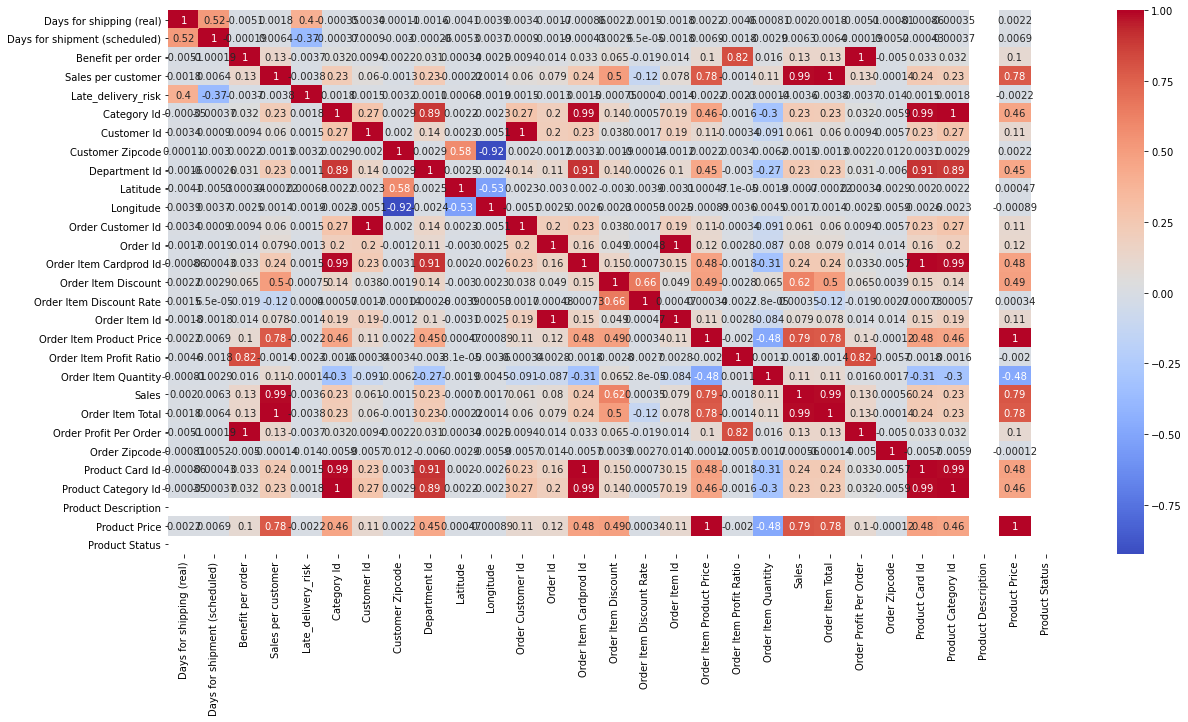

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')

##### 基于不同的Market

In [25]:
dataset['Market'].value_counts()


LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: Market, dtype: int64

In [26]:
market = dataset.groupby('Market')

In [27]:
market['Sales per customer'].sum().sort_values(ascending = False)

Market
Europe          9.769198e+06
LATAM           9.235762e+06
Pacific Asia    7.434263e+06
USCA            4.553500e+06
Africa          2.061679e+06
Name: Sales per customer, dtype: float64

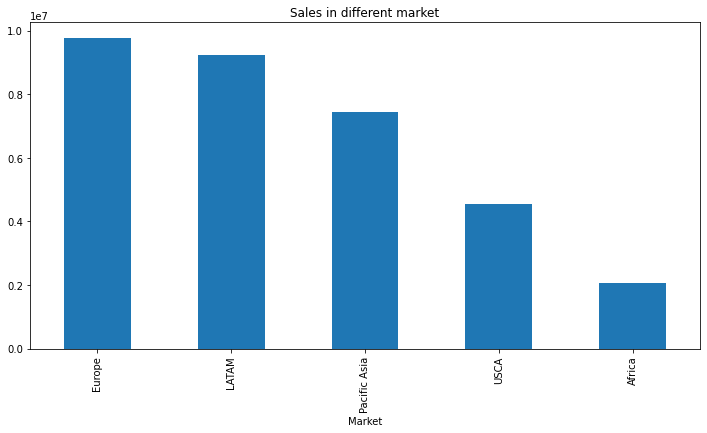

In [28]:
market['Sales per customer'].sum().sort_values(ascending = False).plot.bar(figsize=(12,6), title = 'Sales in different market')

##### 基于不同的Order Region

In [29]:
dataset['Order Region'].value_counts()

Central America    28341
Western Europe     27109
South America      14935
Oceania            10148
Northern Europe     9792
Southeast Asia      9539
Southern Europe     9431
Caribbean           8318
West of USA         7993
South Asia          7731
Eastern Asia        7280
East of USA         6915
West Asia           6009
US Center           5887
South of  USA       4045
Eastern Europe      3920
West Africa         3696
North Africa        3232
East Africa         1852
Central Africa      1677
Southern Africa     1157
Canada               959
Central Asia         553
Name: Order Region, dtype: int64

In [30]:
region = dataset.groupby('Order Region')

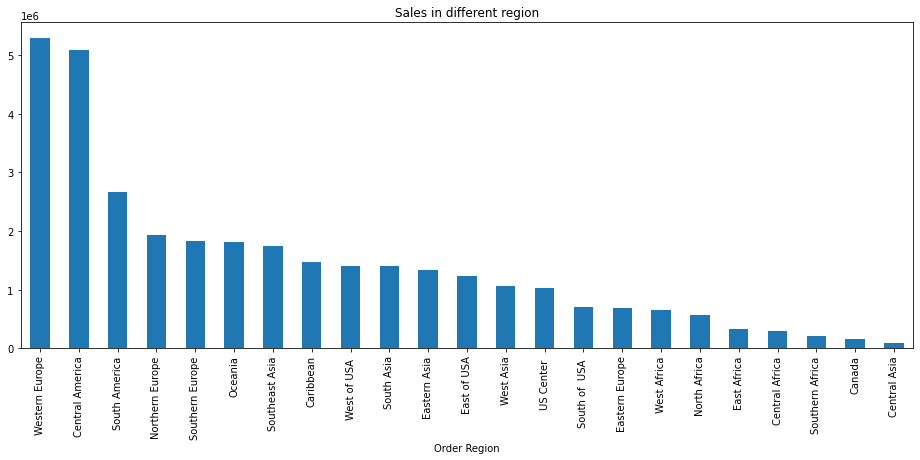

In [31]:
region['Sales per customer'].sum().sort_values(ascending = False).plot.bar(figsize=(16,6), title = 'Sales in different region')

##### 基于不同的category name

In [32]:
category = dataset.groupby('Category Name')

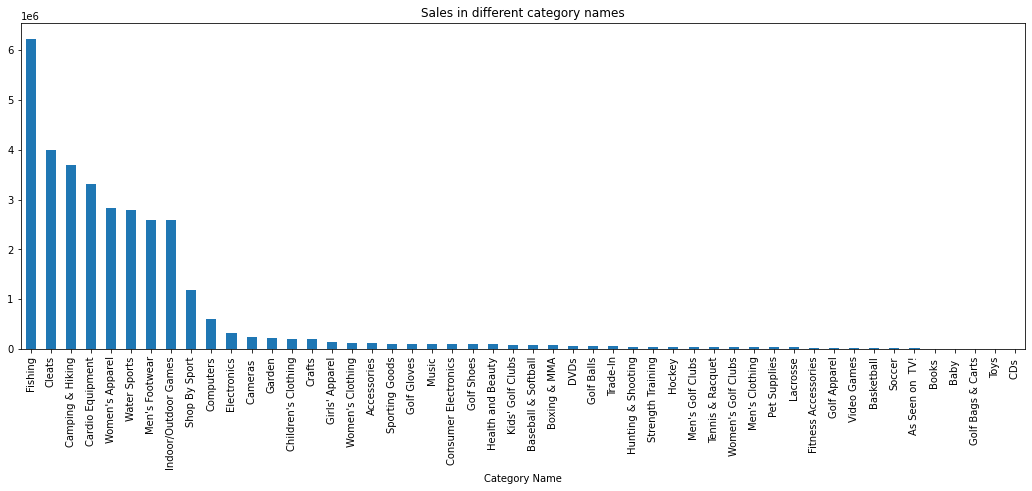

In [33]:
category['Sales per customer'].sum().sort_values(ascending = False).plot.bar(figsize=(18,6), title = 'Sales in different category names')

##### 按照不同的时间维度

In [34]:
data['order date (DateOrders)'].describe()

count              180519
unique              65752
top       8/30/2015 14:54
freq                    5
Name: order date (DateOrders), dtype: object

##### 创建时间戳索引

In [35]:
temp = pd.DatetimeIndex(data['order date (DateOrders)'])
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

###### 取时间字段中的year，month，weekdays,mongth_year

In [36]:
data['order_year'] = temp.year
data['order_month'] = temp.month
data['order_week_day'] = temp.weekday
data['order_hour'] = temp.hour
data['order_month_year'] = temp.to_period('M')
data[['order_year','order_month','order_week_day','order_hour','order_month_year']]

,order_year,order_month,order_week_day,order_hour,order_month_year
0,2018,1,2,22,2018-01
1,2018,1,5,12,2018-01
2,2018,1,5,12,2018-01
3,2018,1,5,11,2018-01
4,2018,1,5,11,2018-01
...,...,...,...,...,...
180514,2016,1,5,3,2016-01
180515,2016,1,5,1,2016-01
180516,2016,1,4,21,2016-01
180517,2016,1,4,20,2016-01


In [38]:
##### 查看weekday的最大最小值
data['order_week_day'].min()

0

In [39]:
data['order_week_day'].max()

6

##### 按照不同的时间维度对销售额进行探索

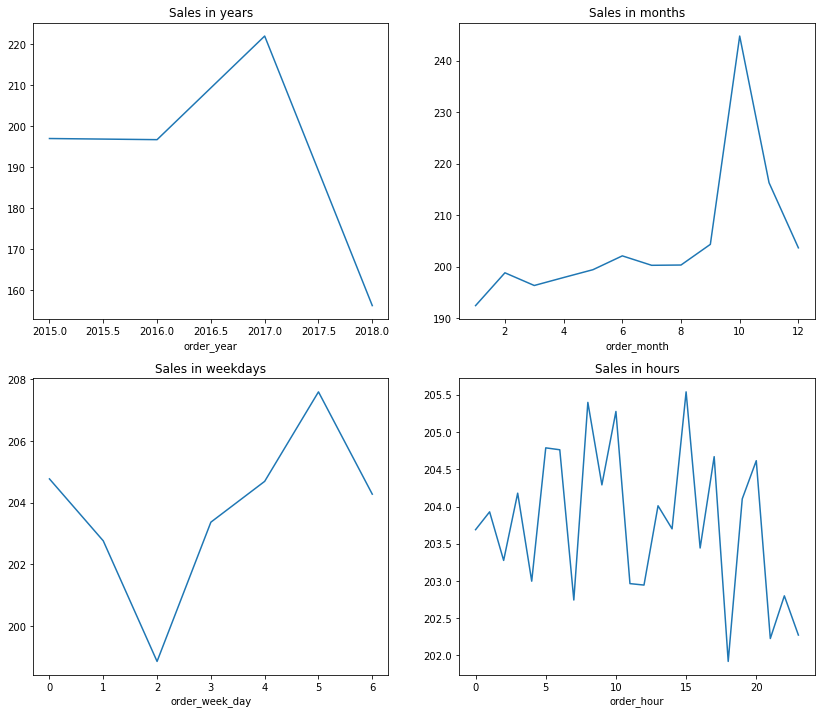

In [42]:
plt.figure(figsize=(10,12))
plt.subplot(2,2,1)
df = data.groupby('order_year')
df['Sales'].mean().plot(figsize=(14,12), title = 'Sales in years')
#df['Sales per customer'].mean().sort_values(ascending = False).plot.bar(figsize=(12,6), title = 'Sales grouped by year')

plt.subplot(2,2,2)
dm = data.groupby('order_month')
dm['Sales'].mean().plot(figsize=(14,12), title = 'Sales in months')

plt.subplot(2,2,3)
dw = data.groupby('order_week_day')
dw['Sales'].mean().plot(figsize=(14,12), title = 'Sales in weekdays')

plt.subplot(2,2,4)
dh = data.groupby('order_hour')
dh['Sales'].mean().plot(figsize=(14,12), title = 'Sales in hours')

##### product price 和sales per customer的关系

Text(0, 0.5, 'Sales per customer')

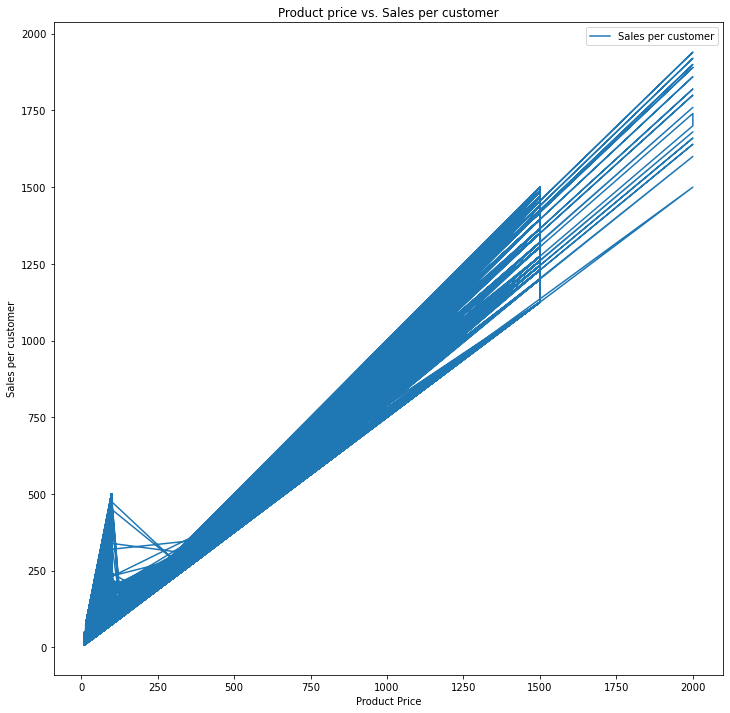

In [44]:
dataset.plot(x = 'Product Price', y = 'Sales per customer',figsize=(12,12),title = 'Product price vs. Sales per customer')
plt.xlabel('Product Price')
plt.ylabel('Sales per customer')